# Median Filter


The **weighted median filter** of an image $u_{ij}$ is defined as:

$$
v_{k,\ell} = \mathrm{median}_w[u_{ij} \mid (i, j) \in \mathcal{N}(k, \ell)]
$$

where $\mathcal{N}(k, \ell)$ denotes some neighborhood of the pixel $u_{k,\ell}$.

For $\omega_j = \frac{1}{N}$, we have the usual (unweighted) median:

$$
\mathrm{median}(f) =
\begin{cases}
f_{\frac{N+1}{2}} & \text{if } N \text{ is odd} \\
\frac{1}{2}(f_{\frac{N}{2}} + f_{\frac{N}{2}+1}) & \text{if } N \text{ is even}
\end{cases}
$$

The median filter is particularly effective for images corrupted by **impulsive noise**.

# Bilateral Filter

One shortcoming of convolutional filters is that the weights $\omega_{ij}$ in the weighted sum

$$
v_{k\ell} = \sum_{(i,j) \in \mathcal{N}(k,\ell)} \omega_{k - i, \ell - j} \, u_{ij}
$$

depend only on the spatial shift.

However, in the presence of a sharp edge, it would make sense to **adapt the weights** also with respect to the **difference in pixel value**.


**Input:**  
- $u_{ij}$: input image  
- $\mathcal{N}(k, \ell)$: local neighborhood  
- $w_s$: spatially dependent weights  
- $w_v$: value dependent weights  

**Output:**  

$$
v_{k\ell} = \frac{
\sum_{(i,j) \in \mathcal{N}(k,\ell)} w_s\big((k, \ell) - (i, j)\big) \, w_v\big(u_{k\ell} - u_{ij}\big) \, u_{ij}
}{
\sum_{(i,j) \in \mathcal{N}(k,\ell)} w_s\big((k, \ell) - (i, j)\big) \, w_v\big(u_{k\ell} - u_{ij}\big)
}
$$


# Non-local means:

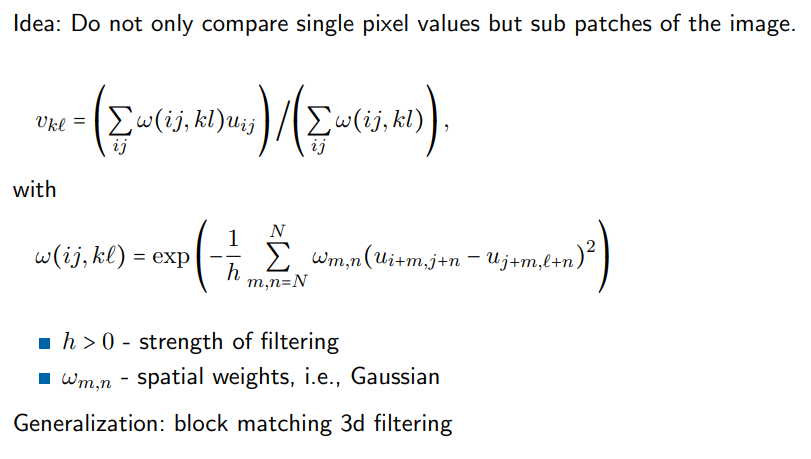


# Structural Tensor

# Goal

Find the direction of edges at a point $x_0$ in an image $u: \Omega \to \mathbb{R}$.

---

###  Idea 1: Use the Gradient

The gradient $\nabla u(x_0)$ points in the direction of maximum change (i.e., the edge normal direction).

Normalize it to get a unit vector:

$$
r(x_0) = \frac{\nabla u(x_0)}{\|\nabla u(x_0)\|}
$$

**Problem:**  
This is very sensitive to noise—small variations in $u$ cause big changes in $r$.

---

###  Idea 2: Use a Least Squares Approach

Instead of using just the gradient at a single point, consider a neighborhood $\mathcal{N}(x_0)$ around $x_0$.

Define $r(x_0)$ as the unit vector $r$ minimizing the weighted sum of squared projections of gradients:

$$
r(x_0) = \arg\min_{\|r\|=1} \int_{\mathcal{N}(x_0)} \omega(x - x_0) \big(r \cdot \nabla u(x)\big)^2 \, dx
$$

Here, $\omega$ is a weighting function emphasizing points close to $x_0$.

---

###  Rewrite using matrices

$$
\int_{\mathcal{N}(x_0)} \omega(x - x_0) (r \cdot \nabla u(x))^2 \, dx = r^\top \left( \int_{\mathcal{N}(x_0)} \omega(x - x_0) \nabla u(x) \nabla u(x)^\top \, dx \right) r
$$

Define the **structure tensor** $J(x_0)$ as:

$$
J(x_0) = \int_{\mathcal{N}(x_0)} \omega(x - x_0) \nabla u(x) \nabla u(x)


For discrete images $u_{ij}$ the structure tensor is given by:

$$
J_{ij} = \sum_{(k,\ell) \in \mathcal{N}(i,j)} \omega(k - i, \ell - j) 
\begin{pmatrix}
[D_1 u]_{k\ell} \cdot [D_1 u]_{k\ell} & [D_1 u]_{k\ell} \cdot [D_2 u]_{k\ell} \\
{}[D_1 u]_{k\ell} \cdot [D_2 u]_{k\ell} & [D_2 u]_{k\ell} \cdot [D_2 u]_{k\ell}
\end{pmatrix}
$$

where $D_1$, $D_2$ are either the finite difference, Sobel, or Prewitt filters with respect to the first and second dimension.

The structure tensor $J_{ij}$ is always symmetric, positive semi-definite and hence has nonnegative eigenvalues $\lambda_1 \geq \lambda_2$ and eigenvectors $v_1, v_2$.

**Interpretation:**

- $\lambda_1 \gg \lambda_2 \implies$ edge in direction $v_2$
- $\lambda_1 \approx \lambda_2 \approx 0 \implies$ uniform region


# Morphological Filters

Let $u: \Omega \subset \mathbb{R}^2 \to \mathbb{R}$ be a discrete or continuous image and $B \subset \mathbb{R}^2$ a mask. Then the **dilation** of $u$ by $B$ is defined as the "maximum filter":

$$
(u \oplus B)(x) = \sup_{b \in B} u(x + b)
$$

and the **erosion** as the "minimum filter":

$$
(u \ominus B)(x) = \inf_{b \in B} u(x + b)
$$

Instead of the largest or smallest value, one can also pick the second largest or smallest value.

If we choose the center value, we have exactly the **median filter**.


# Closing and Opening

Definition of Opening and Closing
Using erosion and dilation:

Opening ($u \circ B$):

$(u \circ B)(x) = (u \ominus B) \oplus B$

Step 1: Erode the image $u$ by $B$ — this removes small objects and shrinks boundaries.

Step 2: Dilate the result by $B$ — this restores the size of remaining objects but without the small objects removed.

Effect: Removes small bright noise, smooths contours, breaks thin connections.

Closing ($u \bullet B$):

$(u \bullet B)(x) = (u \oplus B) \ominus B$

Step 1: Dilate the image $u$ by $B$ — this fills small holes and connects nearby objects.

Step 2: Erode the result by $B$ — restores object sizes but without small holes.

Effect: Fills small holes and gaps, smooths contours, closes thin breaks.



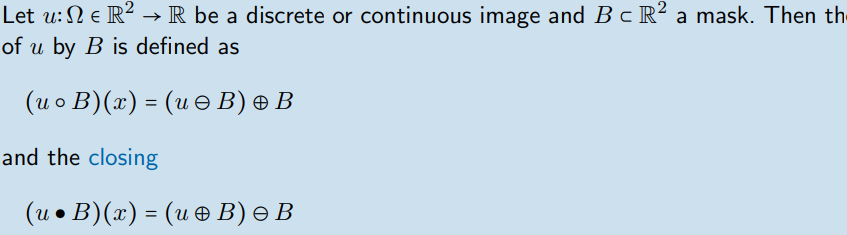